In [ ]:
import numpy as np
import scipy.stats as stats
import random
import matplotlib.pyplot as plt
import math

## 取得模擬的抽樣數據
假設情境：已知台灣某地區的女性平均身高為 160 公分，標準差是 7 公分，並且身高為常態分佈

In [ ]:
# 情境設定
# 後面的程式碼會不斷用到這些參數設定

mean = 160
std_dev = 7
sample_size = 100
np.random.seed(42)

# 正常情況下，我們只會有一組抽樣資料
sample_data = np.random.normal(mean, std_dev, size=sample_size)
print(sample_data[:10])

[163.47699907 159.03214989 164.53381977 170.66120899 158.36092638
 158.3610413  171.05448971 165.3720431  156.7136793  163.79792031]


In [ ]:
print("公式算出的理論標準誤：")
print(np.std(sample_data, ddof=1) / np.sqrt(np.size(sample_data)))
print(stats.sem(sample_data)) # Scipy 有幫你寫好標準誤公式

公式算出的理論標準誤：
0.6357178996054605
0.6357178996054605


## 蒙地卡羅法
模擬「標準誤是樣本平均數抽樣分布的標準差」

In [ ]:
n_sample = 5000

arr = []
for _ in range(n_sample):
    new_data = np.random.normal(mean, std_dev, size=sample_size) # 產生一組抽樣
    arr.append(new_data.mean()) # 紀錄該次抽樣的平均值
np.std(arr) # 計算所有抽樣的標準差

0.7130994535126697

## 拔靴法（Bootstrap）
重複對同一組樣本（有放回地）抽樣多次，得到數個樣本平均數的標準差就是標準誤

In [ ]:
## 同個抽樣的 bootstrap
n_bootstrap = 5000

arr = []
for _ in range(n_bootstrap):
    new_data = random.choices(sample_data, k=sample_size) # 注意，我們一直都在對同一份 "sample_data" 抽樣
    arr.append(np.mean(new_data)) # 紀錄該次抽樣的平均值
np.std(arr) # 計算所有抽樣的標準差

0.6211803449394592

## 標準差公式：樣本標準差與樣本數
$\ \sigma_{M} = \frac{\sigma}{\sqrt{N}} $

我們使用與上述相似假設情境：已知台灣某地區的女性平均身高為 160 公分，並且身高為常態分佈

不同的是，我們想看不同情境的變化：
1. 不同的樣本標準差對標準誤的影響：樣本標準差 = [7, 12, 17]
2. 不同的樣本數對標準誤的影響：樣本數 = [30, 80, 130]

In [ ]:
color_list = ['blue', 'green', 'purple']
sd_list = [7, 12, 17]
sample_size_list = [30, 80, 130]

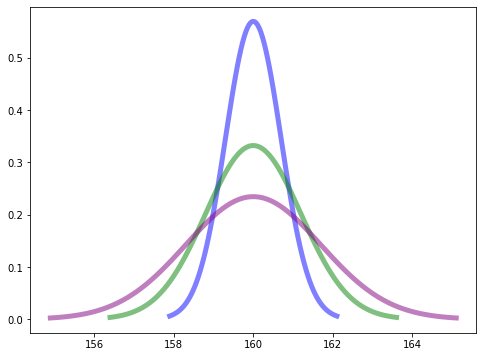

In [ ]:
# 不同的樣本標準差對標準誤的影響

plt.figure(figsize=(8,6))
for sd, color in zip(sd_list, color_list):
    std_err = sd / np.sqrt(sample_size)
    x = np.linspace(mean - 3*std_err, mean + 3*std_err, 100)
    plt.plot(x, stats.norm.pdf(x, mean, std_err), color=color, alpha=0.5, linewidth=5)
plt.show()

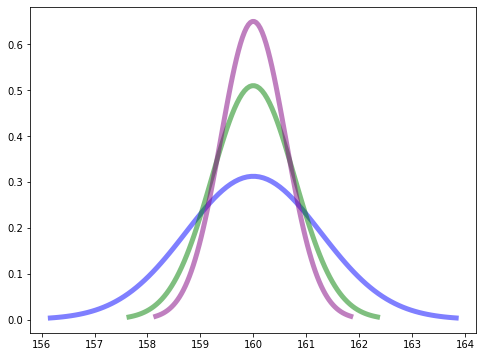

In [ ]:
# 不同的樣本數對標準誤的影響

plt.figure(figsize=(8,6))
for sz, color in zip(sample_size_list, color_list):
    std_err = std_dev / np.sqrt(sz)
    x = np.linspace(mean - 3*std_err, mean + 3*std_err, 100)
    plt.plot(x, stats.norm.pdf(x, mean, std_err), color=color, alpha=0.5, linewidth=5)
plt.show()